# Mini Project Data Engineer di Alterra Academy

## Pengantar

ETL adalah singkatan dari Extract, Transform, Load. Tujuan utama dari notebook ini adalah untuk membersihkan kumpulan data dan menggabungkannya menjadi satu tabel yang nantinya bisa digunakan untuk menjalankan model prediksi biaya total proyek Bank Dunia.

## 1.Ekstraksi Data (Extract)

### 1.1  Ekstraksi File CSV

- Dataset Pertama

#### A. Import library

In [14]:
#library untuk preprocesssing data
import pandas as pd
import numpy as np
import json
import re
# import Levenshtein


#library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#library untuk scrape api
from bs4 import BeautifulSoup
import sqlite3
import requests
from lxml import etree

#library untuk models machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#library untuk database
from google.cloud import storage
from sqlalchemy import create_engine

#### B. Membaca Data

In [15]:
df = pd.read_csv('/content/projects_data.csv', dtype=str)

print('dataset berhasil di masukkan !!')

dataset berhasil di masukkan !!


#### C. Review Data

In [16]:
# membaca data teratas
df.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN


In [17]:
# membaca data terbawah
df.tail()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18247,P037383,Europe and Central Asia,French Republic;French Republic,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### D. Sesuaikan tipe data

In [18]:
# 1. mengecek tipe data asli sebelum di ubah terlebih dahulu
df.dtypes

id                          object
regionname                  object
countryname                 object
prodline                    object
lendinginstr                object
lendinginstrtype            object
envassesmentcategorycode    object
supplementprojectflg        object
productlinetype             object
projectstatusdisplay        object
status                      object
project_name                object
boardapprovaldate           object
board_approval_month        object
closingdate                 object
lendprojectcost             object
ibrdcommamt                 object
idacommamt                  object
totalamt                    object
grantamt                    object
borrower                    object
impagency                   object
url                         object
projectdoc                  object
majorsector_percent         object
sector1                     object
sector2                     object
sector3                     object
sector4             

- mengubah tipe data object ke string sesuai isi dalam kolom

In [19]:
# kolom yang bertipe data object di ubah tipe datanya
kolom_string =['id', 'regionname', 'countryname', 'prodline', 'lendinginstr',
                'lendinginstrtype', 'envassesmentcategorycode', 'supplementprojectflg',
                'productlinetype', 'projectstatusdisplay', 'status',
                'project_name', 'borrower', 'url', 'board_approval_month']

df[kolom_string] = df[kolom_string].astype("string")


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        18248 non-null  string
 1   regionname                18248 non-null  string
 2   countryname               18248 non-null  string
 3   prodline                  18248 non-null  string
 4   lendinginstr              18002 non-null  string
 5   lendinginstrtype          18002 non-null  string
 6   envassesmentcategorycode  12437 non-null  string
 7   supplementprojectflg      18195 non-null  string
 8   productlinetype           18248 non-null  string
 9   projectstatusdisplay      18244 non-null  string
 10  status                    18244 non-null  string
 11  project_name              18248 non-null  string
 12  boardapprovaldate         16744 non-null  object
 13  board_approval_month      16744 non-null  string
 14  closingdate           

- mengubah tipe data object ke integer sesuai isi kolom

In [21]:
kolom_string3 = ['lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt']

# Mengubah tipe data kolom menjadi integer dengan menangani nilai yang tidak dapat diubah
df[kolom_string3] = df[kolom_string3].apply(pd.to_numeric, errors='coerce', downcast='integer')

# downcast='integer' akan mengonversi tipe data float menjadi integer jika memungkinkan

# Cetak tipe data kolom setelah perubahan
print(df.dtypes)


id                          string[python]
regionname                  string[python]
countryname                 string[python]
prodline                    string[python]
lendinginstr                string[python]
lendinginstrtype            string[python]
envassesmentcategorycode    string[python]
supplementprojectflg        string[python]
productlinetype             string[python]
projectstatusdisplay        string[python]
status                      string[python]
project_name                string[python]
boardapprovaldate                   object
board_approval_month        string[python]
closingdate                         object
lendprojectcost                    float64
ibrdcommamt                        float64
idacommamt                         float64
totalamt                           float64
grantamt                            object
borrower                    string[python]
impagency                           object
url                         string[python]
projectdoc 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18248 non-null  string 
 1   regionname                18248 non-null  string 
 2   countryname               18248 non-null  string 
 3   prodline                  18248 non-null  string 
 4   lendinginstr              18002 non-null  string 
 5   lendinginstrtype          18002 non-null  string 
 6   envassesmentcategorycode  12437 non-null  string 
 7   supplementprojectflg      18195 non-null  string 
 8   productlinetype           18248 non-null  string 
 9   projectstatusdisplay      18244 non-null  string 
 10  status                    18244 non-null  string 
 11  project_name              18248 non-null  string 
 12  boardapprovaldate         16744 non-null  object 
 13  board_approval_month      16744 non-null  string 
 14  closin

#### E. Data Cleaning

- mengecek missing value

In [23]:
df.isnull().sum()

id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                  246
lendinginstrtype              246
envassesmentcategorycode     5811
supplementprojectflg           53
productlinetype                 0
projectstatusdisplay            4
status                          4
project_name                    0
boardapprovaldate            1504
board_approval_month         1504
closingdate                  3349
lendprojectcost             18098
ibrdcommamt                  7148
idacommamt                   7908
totalamt                    14645
grantamt                        0
borrower                     5919
impagency                    6097
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                      8721
sector3                     11761
sector4                     13872
sector5       

- mengecek data yang terduplikat

In [24]:
df.duplicated().sum()

0

- setelah di cek missing value dan data yang terduplikat,bahwa masih banyak data yang terdapat nilai null atau missing value, dan tidak ada data yang terduplikat.

- langkah selanjutnya untuk  membersihkan data dari missing value, terlebih dahulu mengahupus kolom yang tidak di butuhkan

In [151]:
del df['Unnamed: 56']
del df['Country']
del df['mjtheme1name']
del df['mjtheme2name']
del df['mjtheme3name']
del df['mjtheme4name']
del df['mjtheme5name']
del df['financier']
del df['GeoLocID']
del df['Latitude']
del df['Longitude']
del df['GeoLocName']
del df['projectdoc']
del df['majorsector_percent']
del df['sector1']
del df['sector2']
del df['sector3']
del df['sector4']
del df['sector5']
del df['sector']
del df['theme1']
del df['theme2']
del df['theme3']
del df['theme4']
del df['theme5']
del df['mjsector1']
del df['mjsector2']
del df['mjsector3']
del df['mjsector4']
del df['mjsector5']
del df['mjsector']
del df['theme']
del df['theme1']
del df['theme2']
del df['theme3']
del df['theme4']
del df['theme5']
del df['location']

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18248 entries, 0 to 18247
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18248 non-null  string 
 1   regionname                18248 non-null  string 
 2   countryname               18248 non-null  string 
 3   prodline                  18248 non-null  string 
 4   lendinginstr              18002 non-null  string 
 5   lendinginstrtype          18002 non-null  string 
 6   envassesmentcategorycode  12437 non-null  string 
 7   supplementprojectflg      18195 non-null  string 
 8   productlinetype           18248 non-null  string 
 9   projectstatusdisplay      18244 non-null  string 
 10  status                    18244 non-null  string 
 11  project_name              18248 non-null  string 
 12  boardapprovaldate         16744 non-null  object 
 13  board_approval_month      16744 non-null  string 
 14  closin

In [28]:
# Forward fill
df.fillna(method='ffill', inplace=True)

- mengecek kembali missing value

In [29]:
df.isnull().sum()

id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                    0
lendinginstrtype                0
envassesmentcategorycode        0
supplementprojectflg            0
productlinetype                 0
projectstatusdisplay            0
status                          0
project_name                    0
boardapprovaldate               0
board_approval_month            0
closingdate                     1
lendprojectcost              1130
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                        3
impagency                       3
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                         4
sector3                         4
sector4                         4
sector5       

In [30]:
# Mengisi nilai yang hilang pada kolom 'kolom_target' dengan nilai dari kolom 'kolom_sumber'
df['closingdate'].fillna(df['closingdate'], inplace=True)
df['lendprojectcost'].fillna(df['lendprojectcost'], inplace=True)
df['borrower'].fillna(df['borrower'], inplace=True)
df['impagency'].fillna(df['impagency'], inplace=True)
df['goal'].fillna(df['goal'], inplace=True)

In [31]:
# Membersihkan kolom 'closingdate' dengan mengisi nilai yang hilang dengan string kosong
df['closingdate'].fillna('', inplace=True)

# Membersihkan kolom 'lendprojectcost' dengan mengisi nilai yang hilang dengan 0
df['lendprojectcost'].fillna(0, inplace=True)

# Membersihkan kolom 'borrower' dengan mengisi nilai yang hilang dengan string kosong
df['borrower'].fillna('', inplace=True)

# Membersihkan kolom 'impagency' dengan mengisi nilai yang hilang dengan string kosong
df['impagency'].fillna('', inplace=True)

# Membersihkan kolom 'impagency' dengan mengisi nilai yang hilang dengan string kosong
df['goal'].fillna('', inplace=True)


In [32]:
df.isnull().sum()

id                              0
regionname                      0
countryname                     0
prodline                        0
lendinginstr                    0
lendinginstrtype                0
envassesmentcategorycode        0
supplementprojectflg            0
productlinetype                 0
projectstatusdisplay            0
status                          0
project_name                    0
boardapprovaldate               0
board_approval_month            0
closingdate                     0
lendprojectcost                 0
ibrdcommamt                     0
idacommamt                      0
totalamt                        0
grantamt                        0
borrower                        0
impagency                       0
url                             0
projectdoc                  18248
majorsector_percent         18248
sector1                         0
sector2                         4
sector3                         4
sector4                         4
sector5       

- sekarang dataset yang telah di pakai menjadi bersih

#### A. Load Dataset

In [33]:
df2 = pd.read_csv('/content/population_data.csv')

#### B. Review Data

In [34]:
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [35]:
df2.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0
263,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3747369.0,3870756.0,3999419.0,4132756.0,4269863.0,4410212.0,...,13558469.0,13810599.0,14086317.0,14386649.0,14710826.0,15054506.0,15411675.0,15777451.0,16150362.0,16529904.0


In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            260 non-null    float64
 5   1961            260 non-null    float64
 6   1962            260 non-null    float64
 7   1963            260 non-null    float64
 8   1964            260 non-null    float64
 9   1965            260 non-null    float64
 10  1966            260 non-null    float64
 11  1967            260 non-null    float64
 12  1968            260 non-null    float64
 13  1969            260 non-null    float64
 14  1970            260 non-null    float64
 15  1971            260 non-null    float64
 16  1972            260 non-null    float64
 17  1973            260 non-null    flo

#### C. Mengecek Missing Value

In [37]:
df2.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 62, dtype: int64

datanya masih terdapat data yang kotor, mari kita bersihkan

In [38]:
# Mengisi nilai yang hilang di kolom 'closingdate' dengan nilai rata-rata
df2['1960'].fillna(df2['1960'].mean(), inplace=True)

# Mengisi nilai yang hilang di kolom 'lendprojectcost' dengan nilai rata-rata
df2['2013'].fillna(df2['2013'].mean(), inplace=True)

# Mengisi nilai yang hilang di kolom 'borrower' dengan nilai rata-rata
df2['2014'].fillna(df2['2014'].mean(), inplace=True)

# Mengisi nilai yang hilang di kolom 'impagency' dengan nilai rata-rata
df2['2015'].fillna(df2['2015'].mean(), inplace=True)

# Mengisi nilai yang hilang di kolom 'impagency' dengan nilai rata-rata
df2['2016'].fillna(df2['2016'].mean(), inplace=True)

# Mengisi nilai yang hilang di kolom 'impagency' dengan nilai rata-rata
df2['2017'].fillna(df2['2017'].mean(), inplace=True)

- mengecek kembali nilai missing value

In [39]:
df2.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2013              0
2014              0
2015              0
2016              0
2017              0
Length: 62, dtype: int64

setelah di isi kolom yang sebelumnya terdapat missing value dan di isi nilai menggunakan nilai rata rata menghasilkan nilai dari kolom yang sebelum nya missing value, dataset menjadi bersih tanpa adanya missing value

#### D. Mengecek duplikat data

In [40]:
df2.duplicated().sum()

0

tidak terdapat juga nilai yang terduplikat

### 1.2 Extraksi JSON

In [41]:
import json

# Buka file JSON
with open('/content/population_data.json', 'r') as file:
    data = json.load(file)




In [42]:
data

[{'Country Name': 'Aruba',
  'Country Code': 'ABW',
  'Indicator Name': 'Population, total',
  'Indicator Code': 'SP.POP.TOTL',
  '1960': 54211.0,
  '1961': 55438.0,
  '1962': 56225.0,
  '1963': 56695.0,
  '1964': 57032.0,
  '1965': 57360.0,
  '1966': 57715.0,
  '1967': 58055.0,
  '1968': 58386.0,
  '1969': 58726.0,
  '1970': 59063.0,
  '1971': 59440.0,
  '1972': 59840.0,
  '1973': 60243.0,
  '1974': 60528.0,
  '1975': 60657.0,
  '1976': 60586.0,
  '1977': 60366.0,
  '1978': 60103.0,
  '1979': 59980.0,
  '1980': 60096.0,
  '1981': 60567.0,
  '1982': 61345.0,
  '1983': 62201.0,
  '1984': 62836.0,
  '1985': 63026.0,
  '1986': 62644.0,
  '1987': 61833.0,
  '1988': 61079.0,
  '1989': 61032.0,
  '1990': 62149.0,
  '1991': 64622.0,
  '1992': 68235.0,
  '1993': 72504.0,
  '1994': 76700.0,
  '1995': 80324.0,
  '1996': 83200.0,
  '1997': 85451.0,
  '1998': 87277.0,
  '1999': 89005.0,
  '2000': 90853.0,
  '2001': 92898.0,
  '2002': 94992.0,
  '2003': 97017.0,
  '2004': 98737.0,
  '2005': 100031.

mengecek missing value pada population_data.json

In [43]:
import pandas as pd

# Baca dataset JSON
with open('/content/population_data.json', 'r') as f:
    data_json = json.load(f)

# Konversi ke DataFrame
df4 = pd.DataFrame(data_json)

# Deteksi nilai yang hilang
missing_values = df4.isna().sum()

# Tampilkan nilai yang hilang
print("Jumlah nilai yang hilang pada setiap kolom:")

missing_values


Jumlah nilai yang hilang pada setiap kolom:


Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 62, dtype: int64

In [44]:
# Mengisi nilai yang hilang di kolom 'closingdate' dengan nilai rata-rata
df4['1960'].fillna(df4['1960'].mean(), inplace=True)

# Mengisi nilai yang hilang di kolom 'lendprojectcost' dengan nilai rata-rata
df4['2013'].fillna(df4['2013'].mean(), inplace=True)

# Mengisi nilai yang hilang di kolom 'borrower' dengan nilai rata-rata
df4['2014'].fillna(df4['2014'].mean(), inplace=True)

# Mengisi nilai yang hilang di kolom 'impagency' dengan nilai rata-rata
df4['2015'].fillna(df4['2015'].mean(), inplace=True)

# Mengisi nilai yang hilang di kolom 'impagency' dengan nilai rata-rata
df4['2016'].fillna(df4['2016'].mean(), inplace=True)

# Mengisi nilai yang hilang di kolom 'impagency' dengan nilai rata-rata
df4['2017'].fillna(df4['2017'].mean(), inplace=True)

In [45]:
# Deteksi nilai yang hilang
missing_values = df4.isna().sum()

print(missing_values)

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2013              0
2014              0
2015              0
2016              0
2017              0
Length: 62, dtype: int64


dataset dari format json, datanya sudah bersih

### 1.3 Ekstraksi file XML

#### A. memasukkan file XML


pertama Memasukkan file xml ke dalam kode program

In [46]:
with open("/content/population_data.xml", "r") as f:
    population_data_xml = f.read()


#### B. Membaca file XML

Membaca file XML dengan beberapa cara diantaranya melakukan parse xml menggunakan library BeatifulSoap, mengubah format data dari format xml kedalam dictionaries library pandas

In [47]:


# melakukan Parse XML menggunakan library Beautiful Soup
populationdata_xml = BeautifulSoup(population_data_xml, "lxml")

# mengubah format data dari format xml kedalam dictionaries library pandas
data = []

for record in populationdata_xml.find_all("record"):
    record_data = {}

    for field in record.find_all("field"):
        name = field.get("name")
        value = field.text
        record_data[name] = value

    data.append(record_data)

# Convert list of dictionaries into DataFrame
population_xml = pd.DataFrame(data)

population_xml.head()

,Country or Area,Item,Year,Value
0,Aruba,"Population, total",1960,54211
1,Aruba,"Population, total",1961,55438
2,Aruba,"Population, total",1962,56225
3,Aruba,"Population, total",1963,56695
4,Aruba,"Population, total",1964,57032


#### C. Mengecek informasi dalam dataset population_data_xml


Mengecek informasi dalam dataset seperti tipe data, jumlah baris dan kolom dataset

In [48]:
population_xml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country or Area  15312 non-null  object
 1   Item             15312 non-null  object
 2   Year             15312 non-null  object
 3   Value            15312 non-null  object
dtypes: object(4)
memory usage: 478.6+ KB


dataset dari population_data_xml memiliki 15312 data dengan 4 columns dan memiliki tipe data object

#### D. Data Cleaning

mengecek missing values dan data terduplikat dari dataset  population_data_xml yang telah di konvert ke dalam dataframe pandas



In [49]:
# mengecek missing values
missingvalues = population_xml.isnull().sum()

print('jumlah missing values :\n', missingvalues)

jumlah missing values :
 Country or Area    0
Item               0
Year               0
Value              0
dtype: int64


dataset dari population_data_xml tidak ada data yang missing values, yang artinya data ini bersih

In [50]:
# mengecek nilai terduplikasi

duplikat_data = population_xml.duplicated().sum()

print('jumlah data yang terduplikat : \n', duplikat_data)

jumlah data yang terduplikat : 
 0


dataset dari population_data_xml tidak ada data yang terduplikasi.

### 1.4 ektraksi file database

#### A. memasukkan dan menghubungkan database SQLite

In [51]:
cnt = sqlite3.connect('/content/population_data.db')
cursor = cnt.cursor()

#### B. Mengubah format opulation_data.db dari database ke dataframe pandas

sebelum membaca data, terlebih dahulu memasukkan query data yang telah di tentukan untuk tetap terhubung ke database sqlite

In [52]:
# Membuka koneksi ke database
cnt = sqlite3.connect('/content/population_data.db')

# Membuat objek cursor
cursor = cnt.cursor()

# Eksekusi query
qr = "SELECT * FROM population_data"
cursor.execute(qr)

# Mendapatkan hasil dari query
results = cursor.fetchall()

# Melakukan operasi lain di sini jika diperlukan

# Tutup koneksi saat sudah selesai menggunakan database
cnt.close()


#### C. Membaca Data

mengubah format data dari db ke databframe pandas dan membaca  data

In [53]:
population_db = pd.DataFrame(results)

population_db.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [54]:
population_db.tail()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0
263,263,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3747369.0,3870756.0,3999419.0,4132756.0,4269863.0,...,13558469.0,13810599.0,14086317.0,14386649.0,14710826.0,15054506.0,15411675.0,15777451.0,16150362.0,16529904.0


#### D. Informasi Data

mengecek jumlah dataset dari population_db dan jumlah columns dan tipe data

In [55]:
population_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       264 non-null    int64  
 1   1       264 non-null    object 
 2   2       264 non-null    object 
 3   3       264 non-null    object 
 4   4       264 non-null    object 
 5   5       260 non-null    float64
 6   6       260 non-null    float64
 7   7       260 non-null    float64
 8   8       260 non-null    float64
 9   9       260 non-null    float64
 10  10      260 non-null    float64
 11  11      260 non-null    float64
 12  12      260 non-null    float64
 13  13      260 non-null    float64
 14  14      260 non-null    float64
 15  15      260 non-null    float64
 16  16      260 non-null    float64
 17  17      260 non-null    float64
 18  18      260 non-null    float64
 19  19      260 non-null    float64
 20  20      260 non-null    float64
 21  21      260 non-null    float64
 22  22

dalam dataset population_db terdapat 264 data dengan bertipe data float64, object, int 64 dengan 63 columns

#### E. Data Cleaning

mengecek missing value dan data yang terduplikat dari dataset population_db

In [56]:
# mengecek missing values
missingvalues_db = population_db.isnull().sum()

print('jumlah missing values :\n', missingvalues_db)

jumlah missing values :
 0     0
1     0
2     0
3     0
4     0
     ..
58    2
59    2
60    2
61    2
62    2
Length: 63, dtype: int64


setelah di cek, terdapat beberapa data yang masih kotor, mari kita bersihkan

In [57]:
# Mengisi nilai yang hilang dengan nilai rata-rata
population_db[58].fillna(population_db[58].mean(), inplace=True)
population_db[59].fillna(population_db[59].mean(), inplace=True)
population_db[60].fillna(population_db[60].mean(), inplace=True)
population_db[61].fillna(population_db[61].mean(), inplace=True)
population_db[62].fillna(population_db[62].mean(), inplace=True)

In [58]:
# mengecek missing values
missingvalues_db = population_db.isnull().sum()

print('jumlah missing values :\n', missingvalues_db)

jumlah missing values :
 0     0
1     0
2     0
3     0
4     0
     ..
58    0
59    0
60    0
61    0
62    0
Length: 63, dtype: int64


missing value dari dataset population_data.db yang sebelumnya terdapat missing value, sekarang sudah bersih

In [59]:
# mengecek Data yang terduplikasi
duplikat_db = population_db.duplicated().sum()

print('jumlah data yang terduplikat :\n', duplikat_db)

jumlah data yang terduplikat :
 0


tidak ada data yang terduplikat

### 1.5 ektraksi data API

#### A. Mesukkan Endpoint API

mengambil data dari API World Bank menggunakan metode Endpoint API

In [60]:
# mengambil data dari Endpoint API World Bank
url = "https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?format=json&per_page=30000"

# mengirim request ke GET
response = requests.get(url)

#### B. Membaca data

setelah menarik data dari Endpoint API World Bank, selanjutnya mengubah format ke dalam dataframe pandas

In [61]:
# Mengecek request Endpoint API World Bank, jika request sukses terbaca, maka di berikan  (status code 200)
if response.status_code == 200:
    # Extract relevant data from JSON response
    data = response.json()[1]  # Data starts from index 1

    # mengambil nama nama variable dari  Endpoint API World Bank
    records = []
    for entry in data:
        record = {
            "Country Name": entry["country"]["value"],
            "Country Code": entry["countryiso3code"],
            "Year": entry["date"],
            "Population": entry["value"]
        }
        records.append(record)

# konversi kedalam format dictionaries DataFrame
    population_API = pd.DataFrame(records)

    print("Number of records extracted:", len(population_API))
else:
    print("Error:", response.status_code)


# Membaca data
population_API.head()

Number of records extracted: 17024


,Country Name,Country Code,Year,Population
0,Africa Eastern and Southern,AFE,2023,NaN
1,Africa Eastern and Southern,AFE,2022,720859132.0
2,Africa Eastern and Southern,AFE,2021,702977106.0
3,Africa Eastern and Southern,AFE,2020,685112979.0
4,Africa Eastern and Southern,AFE,2019,667242986.0


#### C. Cleaning Data

mengecek missing value dan data terduplikat dari Endpoint API World Bank

In [62]:
# mengecek missing values
missingvalues_api = population_API.isnull().sum()

print('jumlah missing values :\n', missingvalues_api)

jumlah missing values :
 Country Name      0
Country Code      0
Year              0
Population      359
dtype: int64


terdapat missing value di variable population sebanyak 359, mari kita bersihkan

In [63]:
# Mengisi nilai yang hilang dengan nilai rata-rata
population_API['Population'].fillna(population_API['Population'].mean(), inplace=True)


In [64]:
# mengecek missing values
missingvalues_api = population_API.isnull().sum()

print('jumlah missing values :\n', missingvalues_api)

jumlah missing values :
 Country Name    0
Country Code    0
Year            0
Population      0
dtype: int64


data dari end point API World bank telah bersih

In [65]:
# mengecek Data yang terduplikasi
duplikat_api = population_API.duplicated().sum()

print('jumlah data yang terduplikat :\n', duplikat_api)

jumlah data yang terduplikat :
 0


tidak ada data yang terduplikat

# 2 TRANSFORM DATA



## 2.1 Kombinasikan data dari rural_population_percent.csv dan electricity_access_percent.csv yang merupakan data populasi pedesaan dan akses listrik dari berbagai negara. dan kemudian gabungkan menggunakan pandas. (jangan lupa melakukan penyesuaian terhadap dataset ini, cek missing values, duplikasi data, dan lain-lain).

### A. Load Data



In [66]:
ruralpopulation_data = pd.read_csv("/content/rural_population_percent.csv", skiprows=4)
electricityaccess_data = pd.read_csv("/content/electricity_access_percent.csv", skiprows=4)

### B. Membaca data

In [67]:
ruralpopulation_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN


In [68]:
electricityaccess_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN


### C. informasi data

In [69]:
ruralpopulation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            259 non-null    float64
 5   1961            259 non-null    float64
 6   1962            259 non-null    float64
 7   1963            259 non-null    float64
 8   1964            259 non-null    float64
 9   1965            259 non-null    float64
 10  1966            259 non-null    float64
 11  1967            259 non-null    float64
 12  1968            259 non-null    float64
 13  1969            259 non-null    float64
 14  1970            259 non-null    float64
 15  1971            259 non-null    float64
 16  1972            259 non-null    float64
 17  1973            259 non-null    flo

In [70]:
electricityaccess_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

### D. data cleaning

mengecek dan membersihkan jika ada missing value dan data terduplikat

In [71]:
# Cek missing values
missingvalues_ruralpopulationdata = ruralpopulation_data.isnull().sum()
print("Jumlah Missing Values:\n", missingvalues_ruralpopulationdata)

Jumlah Missing Values:
 Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                5
                 ... 
2014                4
2015                4
2016                4
2017                4
Unnamed: 62       264
Length: 63, dtype: int64


terdapat missing value, mari kita bersihkan

In [72]:
# Mengisi nilai yang hilang dengan nilai rata-rata
ruralpopulation_data.fillna(0, inplace=True)

In [73]:
# Cek missing values
missingvalues_ruralpopulationdata = ruralpopulation_data.isnull().sum()
print("Jumlah Missing Values:\n", missingvalues_ruralpopulationdata)

Jumlah Missing Values:
 Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2014              0
2015              0
2016              0
2017              0
Unnamed: 62       0
Length: 63, dtype: int64


dataset bersih

In [74]:
missingvalues_electricityaccess_data = electricityaccess_data.isnull().sum()
print("Jumlah Missing Values:\n", missingvalues_electricityaccess_data)

Jumlah Missing Values:
 Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2014                3
2015                3
2016                3
2017              264
Unnamed: 62       264
Length: 63, dtype: int64


In [75]:
# Mengisi nilai yang hilang dengan nilai rata-rata
electricityaccess_data.fillna(0, inplace=True)

In [76]:
missingvalues_electricityaccess_data = electricityaccess_data.isnull().sum()
print("Jumlah Missing Values:\n", missingvalues_electricityaccess_data)

Jumlah Missing Values:
 Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2014              0
2015              0
2016              0
2017              0
Unnamed: 62       0
Length: 63, dtype: int64


dataset bersih

In [77]:
# Cek duplikasi data
duplicate_rows = ruralpopulation_data.duplicated().sum()
print("Jumlah Duplikasi Data:", duplicate_rows)

Jumlah Duplikasi Data: 0


tidak ada data yang terduplikat

In [78]:
# Cek duplikasi data
duplicate_rows2 = electricityaccess_data.duplicated().sum()
print("Jumlah Duplikasi Data:", duplicate_rows2)

Jumlah Duplikasi Data: 0


tidak ada data yang terduplikat

menghapus kolom yang tidak digunakan

In [79]:
# Menghapus kolom "Unnamed: 62" dari dataframe electricity_access_df
ruralpopulation_data.drop(columns=['Unnamed: 62'], inplace=True)

# Menghapus kolom "Unnamed: 62" dari dataframe rural_population_df
electricityaccess_data.drop(columns=['Unnamed: 62'], inplace=True)

electricityaccess_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,0.0
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,0.0
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,0.0
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0


In [80]:
ruralpopulation_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873


menggabungkan dataframe rural_population dengan electricity_access

In [81]:
# Pilih kolom tahun yang akan digunakan
ruralpopulation_data = ruralpopulation_data[["Country Name", "Country Code"] + [str(year) for year in range(1960, 2018)]]
electricityaccess_data = electricityaccess_data[["Country Name", "Country Code"] + [str(year) for year in range(1960, 2018)]]

# Gabungkan data berdasarkan kolom "Country Name" dan "Country Code"
merged_rural_electricity_df = pd.merge(ruralpopulation_data, electricityaccess_data, on=["Country Name", "Country Code"], suffixes=('_rural', '_electricity'))

merged_rural_electricity_df.head()

,Country Name,Country Code,1960_rural,1961_rural,1962_rural,1963_rural,1964_rural,1965_rural,1966_rural,1967_rural,...,2008_electricity,2009_electricity,2010_electricity,2011_electricity,2012_electricity,2013_electricity,2014_electricity,2015_electricity,2016_electricity,2017_electricity
0,Aruba,ABW,49.224,49.239,49.254,49.270,49.285,49.300,49.315,49.330,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,0.0
1,Afghanistan,AFG,91.779,91.492,91.195,90.890,90.574,90.250,89.915,89.570,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,0.0
2,Angola,AGO,89.565,89.202,88.796,88.376,87.942,87.496,87.035,86.559,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,0.0
3,Albania,ALB,69.295,69.057,68.985,68.914,68.842,68.770,68.698,68.626,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
4,Andorra,AND,41.550,39.017,36.538,34.128,31.795,29.555,27.407,25.359,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0


mengatur presentase

In [82]:
# Daftar tahun yang ingin Anda proses
tahun = range(1960, 2018)  # Misalnya, dari tahun 1960 hingga 2017

# Melakukan loop melalui setiap tahun
for year in tahun:
    # Membulatkan nilai persentase ke satu desimal
    merged_rural_electricity_df[f"{year}_rural"] = merged_rural_electricity_df[f"{year}_rural"].round(2)
    merged_rural_electricity_df[f"{year}_electricity"] = merged_rural_electricity_df[f"{year}_electricity"].round(2)

merged_rural_electricity_df.head()


,Country Name,Country Code,1960_rural,1961_rural,1962_rural,1963_rural,1964_rural,1965_rural,1966_rural,1967_rural,...,2008_electricity,2009_electricity,2010_electricity,2011_electricity,2012_electricity,2013_electricity,2014_electricity,2015_electricity,2016_electricity,2017_electricity
0,Aruba,ABW,49.22,49.24,49.25,49.27,49.28,49.30,49.32,49.33,...,93.09,93.35,93.36,93.94,94.26,94.58,94.91,95.24,95.57,0.0
1,Afghanistan,AFG,91.78,91.49,91.20,90.89,90.57,90.25,89.92,89.57,...,42.40,44.85,42.70,43.22,69.10,67.26,89.50,71.50,84.14,0.0
2,Angola,AGO,89.56,89.20,88.80,88.38,87.94,87.50,87.04,86.56,...,31.27,32.38,33.51,34.60,35.82,36.99,32.00,42.00,40.52,0.0
3,Albania,ALB,69.30,69.06,68.98,68.91,68.84,68.77,68.70,68.63,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.0
4,Andorra,AND,41.55,39.02,36.54,34.13,31.80,29.56,27.41,25.36,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,0.0


membuat pembaran dataframe

In [83]:
# Melt DataFrame untuk mengubah kolom tahun-tahun menjadi satu kolom 'Year' dan nilai presentase menjadi satu kolom 'Value'
df_melted = pd.melt(merged_rural_electricity_df, id_vars=['Country Name', 'Country Code'], var_name='Year', value_name='Value')

# Splitting 'Year' column into 'Year' and 'Type' columns
df_melted[['Year', 'Type']] = df_melted['Year'].str.split('_', expand=True)

# Filter hanya untuk jenis data 'rural' dan 'electricity'
df_filtered = df_melted[df_melted['Type'].isin(['rural', 'electricity'])]

# Menggabungkan kembali data untuk mendapatkan kolom baru 'electricityaccesspercent'
df_pivot = df_filtered.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Type', values='Value').reset_index()

# Menampilkan DataFrame hasil akhir dengan kolom yang diinginkan
merged_rural_electricity_df = df_pivot[['Country Name', 'Country Code', 'Year', 'rural', 'electricity']]
merged_rural_electricity_df.columns = ['Country Name', 'Country Code', 'Year', 'ruralpopulationpercent', 'electricityaccesspercent']
merged_rural_electricity_df.head(10)

,Country Name,Country Code,Year,ruralpopulationpercent,electricityaccesspercent
0,Afghanistan,AFG,1960,91.78,0.0
1,Afghanistan,AFG,1961,91.49,0.0
2,Afghanistan,AFG,1962,91.20,0.0
3,Afghanistan,AFG,1963,90.89,0.0
4,Afghanistan,AFG,1964,90.57,0.0
5,Afghanistan,AFG,1965,90.25,0.0
6,Afghanistan,AFG,1966,89.92,0.0
7,Afghanistan,AFG,1967,89.57,0.0
8,Afghanistan,AFG,1968,89.21,0.0
9,Afghanistan,AFG,1969,88.85,0.0


mengganti variable country name

In [84]:
# Terapkan penggantian menggunakan ekspresi reguler pada kolom 'Country Name'

merged_rural_electricity_df['Country Name'] = merged_rural_electricity_df['Country Name'].str.replace('"', '').str.split(',').str[0]

# Menampilkan hasil
merged_rural_electricity_df.head()

,Country Name,Country Code,Year,ruralpopulationpercent,electricityaccesspercent
0,Afghanistan,AFG,1960,91.78,0.0
1,Afghanistan,AFG,1961,91.49,0.0
2,Afghanistan,AFG,1962,91.20,0.0
3,Afghanistan,AFG,1963,90.89,0.0
4,Afghanistan,AFG,1964,90.57,0.0


### E. Saving to csv

In [85]:
# Simpan DataFrame ke dalam file CSV
merged_rural_electricity_df.to_csv('gabungdataframe_rural_electricity.csv', index=False)

## 2.2 Cleaning Data population_data.csv, population_data.json, population_data.xml, dan population_data.db. lakukan penyesuaian terhadap dataset ini, cek missing values, duplikasi data, dan lain-lain.

### A. Load Dataset

memasukkan dataset :
- Population_data.csv
- population_data.json
- population_data.xml
- population_data.db

In [86]:
# read dataset Population_data.csv
population_data_1 = pd.melt(df2, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Population')

population_data_1.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0
5,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,92490932.0
6,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,1960,92634.0
7,Argentina,ARG,"Population, total",SP.POP.TOTL,1960,20619075.0
8,Armenia,ARM,"Population, total",SP.POP.TOTL,1960,1874120.0
9,American Samoa,ASM,"Population, total",SP.POP.TOTL,1960,20013.0


In [87]:
# read dataset population_data.json
population_data_2 = pd.melt(df4, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Population')

population_data_2.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0
5,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,92490932.0
6,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,1960,92634.0
7,Argentina,ARG,"Population, total",SP.POP.TOTL,1960,20619075.0
8,Armenia,ARM,"Population, total",SP.POP.TOTL,1960,1874120.0
9,American Samoa,ASM,"Population, total",SP.POP.TOTL,1960,20013.0


In [88]:
#read dataset population_data.xml

# Mengubah nama kolom
population_data_3 = population_xml.rename(columns={'Country or Area': 'Country Name', 'Item': 'Indicator Name', 'Value': 'Population'})

# Menampilkan hasil
population_data_3.head()

,Country Name,Indicator Name,Year,Population
0,Aruba,"Population, total",1960,54211
1,Aruba,"Population, total",1961,55438
2,Aruba,"Population, total",1962,56225
3,Aruba,"Population, total",1963,56695
4,Aruba,"Population, total",1964,57032


In [89]:
# Ubah nama kolom
population_db = population_db.rename(columns={1: 'Country Name', 2: 'Country Code', 3: 'Indicator Name', 4: 'Indicator Code'})

# Drop kolom pertama
population_db = population_db.drop(columns=[0])

# Ubah nama kolom 5 - 62
new_columns = {i: str(1960 + i - 5) for i in range(5, 63)}
population_db = population_db.rename(columns=new_columns)

# Menampilkan hasil
population_db.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [90]:
# Melting dataset
population_data_4 = pd.melt(population_db, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Population')

population_data_4.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0
5,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,92490932.0
6,United Arab Emirates,ARE,"Population, total",SP.POP.TOTL,1960,92634.0
7,Argentina,ARG,"Population, total",SP.POP.TOTL,1960,20619075.0
8,Armenia,ARM,"Population, total",SP.POP.TOTL,1960,1874120.0
9,American Samoa,ASM,"Population, total",SP.POP.TOTL,1960,20013.0


### B. gabung dataframe

menggabungkan dataframe :

- Population_data.csv
- population_data.json
- population_data.xml
- population_data.db

In [91]:
# Menggabungkan DataFrame menggunakan combine_first()
merged_population_df = population_data_1.combine_first(population_data_2)
merged_population_df = merged_population_df.combine_first(population_data_3)
merged_population_df = merged_population_df.combine_first(population_data_4)

In [92]:
# Menghilangkan duplikasi data
merged_population_df = merged_population_df.drop_duplicates()

In [93]:
# Menampilkan hasil
merged_population_df.head()

,Country Code,Country Name,Indicator Code,Indicator Name,Population,Year
0,ABW,Aruba,SP.POP.TOTL,"Population, total",54211.0,1960
1,AFG,Afghanistan,SP.POP.TOTL,"Population, total",8996351.0,1960
2,AGO,Angola,SP.POP.TOTL,"Population, total",5643182.0,1960
3,ALB,Albania,SP.POP.TOTL,"Population, total",1608800.0,1960
4,AND,Andorra,SP.POP.TOTL,"Population, total",13411.0,1960


In [94]:
merged_population_df.tail()

,Country Code,Country Name,Indicator Code,Indicator Name,Population,Year
15307,XKX,Kosovo,SP.POP.TOTL,"Population, total",1830700.0,2017
15308,YEM,"Yemen, Rep.",SP.POP.TOTL,"Population, total",28250420.0,2017
15309,ZAF,South Africa,SP.POP.TOTL,"Population, total",56717156.0,2017
15310,ZMB,Zambia,SP.POP.TOTL,"Population, total",17094130.0,2017
15311,ZWE,Zimbabwe,SP.POP.TOTL,"Population, total",16529904.0,2017


In [95]:
# menyusun kembali  kolom sesuai urutan yang sebelumnya telah diatur
merged_population_df = merged_population_df.reindex(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Year', 'Population'])

# Menampilkan hasil
merged_population_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0


### C. data Cleaning

pada tahapan ini sebelum masuk e data cleaning, kita melihat informasi dari data yang telah di gabungkan, selanjutnya mengecek apakah terdapat missing value dan data terduplikat, jika ada maka kita bersihkan

In [96]:
merged_population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15312 entries, 0 to 15311
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    15312 non-null  object
 1   Country Code    15312 non-null  object
 2   Indicator Name  15312 non-null  object
 3   Indicator Code  15312 non-null  object
 4   Year            15312 non-null  object
 5   Population      15312 non-null  object
dtypes: object(6)
memory usage: 717.9+ KB


In [97]:
#Mengecek Missing Value
merged_population_df.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
Year              0
Population        0
dtype: int64

dataset yang telah di gabung tampaknya sudah bersih

In [98]:
# mengecek nilai yang terduplikat
merged_population_df.duplicated().sum()

0

tidak terdapat juga nilai yang terduplikat

## 2.3 Penyesuaian tipe data untuk dataset projects_data.csv, population_data.csv, population_data.json, population_data.xml, dan population_data.db. misalnya yang sesuai dengan tipe data datetime, float, integer, string, dan lain-lain. bisa menggunakn to_numeric, to_datetime, dan lain-lain.

setelah sebelumnya telah di gabungkan beberapa data menjadi 1 dataset selanjutnya kita akan penyesuaian tipe data

- mengubah tipe data dari object ke string

In [99]:
# mengubah tipe data yang sesuai isi columns

# mengubah tipe data dari object ke string
merged_population_df.loc[:, 'Country Name'] = merged_population_df['Country Name'].astype(str)


In [100]:
# mengubah tipe data yang sesuai isi columns

# mengubah tipe data dari object ke string
merged_population_df.loc[:, 'Country Code'] = merged_population_df['Country Code'].astype(str)

- mengubah tipe data dari object ke float

In [101]:
# mengubah tipe data yang sesuai isi columns

# mengubah tipe data dari object ke float
merged_population_df.loc[:, 'Population'] = merged_population_df['Population'].astype(str)

- mengubah tipe data dari object ke integer

In [102]:
# mengubah tipe data yang sesuai isi columns

# mengubah tipe data dari object ke int
merged_population_df.loc[:, 'Year'] = merged_population_df['Year'].astype(str)

- menyimpan file gabungan sebelumnya ke dalam file csv

In [103]:
# menyimpan dataset
# Simpan ke file CSV
merged_population_df.to_csv('merged_population.csv', index=False)

## 2.4 Encoding dataset mystery.csv yang memiliki encoding berbeda. gunakan encoding='utf-16' untuk membaca dataset ini.

### A. membaca data

In [105]:
ed_df = pd.read_csv('/content/mystery.csv', encoding='utf-16')

ed_df

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [106]:
ed_df.head()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [107]:
ed_df.tail()

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0
263,263,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,3747369.0,3870756.0,3999419.0,4132756.0,4269863.0,...,13558469.0,13810599.0,14086317.0,14386649.0,14710826.0,15054506.0,15411675.0,15777451.0,16150362.0,16529904.0


### B. melihat Informasi dataset

In [108]:
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      264 non-null    int64  
 1   Country Name    264 non-null    object 
 2   Country Code    264 non-null    object 
 3   Indicator Name  264 non-null    object 
 4   Indicator Code  264 non-null    object 
 5   1960            260 non-null    float64
 6   1961            260 non-null    float64
 7   1962            260 non-null    float64
 8   1963            260 non-null    float64
 9   1964            260 non-null    float64
 10  1965            260 non-null    float64
 11  1966            260 non-null    float64
 12  1967            260 non-null    float64
 13  1968            260 non-null    float64
 14  1969            260 non-null    float64
 15  1970            260 non-null    float64
 16  1971            260 non-null    float64
 17  1972            260 non-null    flo

### C. Data Cleaning

pertama megecek missing value pada dataset, menghapus kolom yang tidak penting, mengecek data yang terduplikat

In [109]:
ed_df.isnull().sum()

Unnamed: 0        0
Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
                 ..
2013              2
2014              2
2015              2
2016              2
2017              2
Length: 63, dtype: int64

terdapat missing value mari kita bersihkan, pertama tama menghapus columns yang tidak dipakai


In [110]:
del ed_df['Unnamed: 0']

In [111]:
ed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 62 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            260 non-null    float64
 5   1961            260 non-null    float64
 6   1962            260 non-null    float64
 7   1963            260 non-null    float64
 8   1964            260 non-null    float64
 9   1965            260 non-null    float64
 10  1966            260 non-null    float64
 11  1967            260 non-null    float64
 12  1968            260 non-null    float64
 13  1969            260 non-null    float64
 14  1970            260 non-null    float64
 15  1971            260 non-null    float64
 16  1972            260 non-null    float64
 17  1973            260 non-null    flo

columns unamed telah terhapus

selanjutnya membersihkan missing value

In [112]:
# Mengisi nilai yang hilang dengan nilai rata-rata
ed_df.fillna(0, inplace=True)

mengecek kembali missing value

In [113]:
ed_df.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2013              0
2014              0
2015              0
2016              0
2017              0
Length: 62, dtype: int64

dataset dari mystery.csv sudah bersih

mengecek data yang terduplikat

In [114]:
ed_df.duplicated().sum()

0

tidak ada nilai yang terduplikat

simpan data ke dalam csv yang telah di preprocessin dan di bersihkan

In [115]:
ed_df.to_csv('clean_mystery.csv', index=False)

## 2.4 Imputing Data pada dataset gdp_data.csv yang memiliki missing values. gunakan SimpleImputer untuk mengisi missing values pada dataset ini atau teknik lain seperti menggunakan fillna, mean, median, dan lain-lain.

 ### A. load dataset

In [116]:
gdp_df = pd.read_csv('/content/gdp_data.csv', skiprows=4)

gdp_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10,NaN


### B. Review Data

In [117]:
gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [118]:
gdp_df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10,NaN
263,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1.052990e+09,1.096647e+09,1.117602e+09,1.159512e+09,1.217138e+09,1.311436e+09,...,8.621574e+09,1.014186e+10,1.209845e+10,1.424249e+10,1.545177e+10,1.589105e+10,1.630467e+10,1.661996e+10,1.784582e+10,NaN


In [119]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            124 non-null    float64
 5   1961            124 non-null    float64
 6   1962            125 non-null    float64
 7   1963            125 non-null    float64
 8   1964            125 non-null    float64
 9   1965            136 non-null    float64
 10  1966            137 non-null    float64
 11  1967            141 non-null    float64
 12  1968            145 non-null    float64
 13  1969            145 non-null    float64
 14  1970            153 non-null    float64
 15  1971            155 non-null    float64
 16  1972            155 non-null    float64
 17  1973            155 non-null    flo

### C. Data Cleaning

- mengecek missing value

In [120]:
gdp_df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2014               17
2015               18
2016               23
2017               30
Unnamed: 62       264
Length: 63, dtype: int64

masih terdapat nilai kotor, mari bersihkan

In [121]:
# Mengisi nilai yang hilang dengan nilai rata-rata
gdp_df.fillna(0, inplace=True)

In [122]:
gdp_df.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              0
                 ..
2014              0
2015              0
2016              0
2017              0
Unnamed: 62       0
Length: 63, dtype: int64

- mengecek nilai yang terduplikat

In [123]:
gdp_df.duplicated().sum()

0

- mengapus columns yang tidak di perlukan

In [124]:
del gdp_df['Unnamed: 62']

gdp_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


tidak ada data yang terduplikat

## D. EDA (EXPLORATORY DATA ANALYSIS)

- Memasukkan model simple imputer
- membuat visualisasi

In [125]:
countries_to_visualize = ['Afghanistan', 'Albania', 'Honduras']

In [126]:
# Menghapus kolom non-numerik
df_numeric = gdp_df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])

In [127]:
# memasukkan model SimpleImputer

imputer = SimpleImputer(strategy='mean')

In [128]:
# Mengisi nilai yang hilang
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

- Visualisasi perbandingan GDP per kapita sebelum dan sesudah imputasi untuk setiap negara

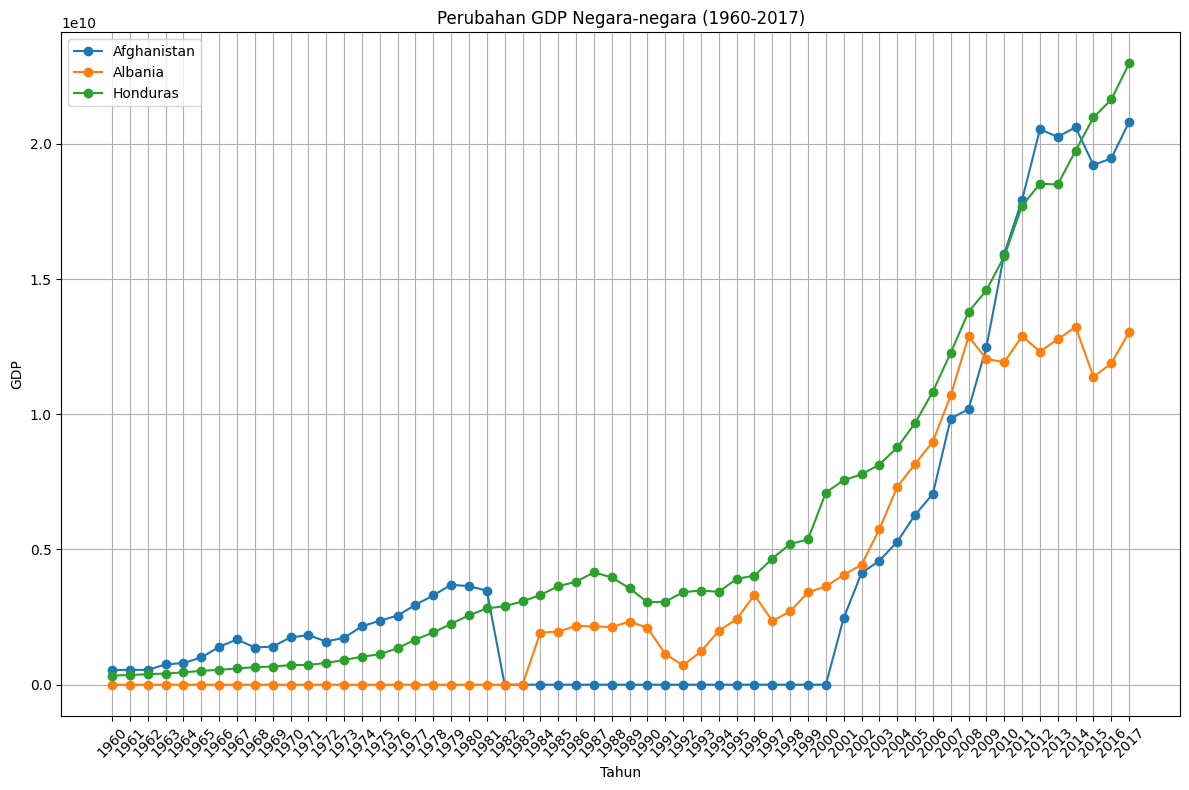

In [129]:
# Visualisasi perubahan GDP untuk negara-negara tertentu dari tahun 1960 hingga 2017
plt.figure(figsize=(12, 8))

for country in countries_to_visualize:
    plt.plot(df_imputed.columns, df_imputed.loc[gdp_df['Country Name'] == country].values.flatten(), marker='o', label=country)

plt.title('Perubahan GDP Negara-negara (1960-2017)')
plt.xlabel('Tahun')
plt.ylabel('GDP')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Penjelasan Visualisasi :     

bisa dilihat bahwa visualisasi di atas yang menggunakan proses Simple imputer menunjukan terdapat perubahan GDP (dara mengenai produk domestik bro) negara - negara dari tahun 1960 - 2017. grafik visualisasi di atas menunjukan bawah terdapat 3 negara yang mendapatkan perubahan, seperti negara Afghanistan, Albania, Honduras, 3 negara tersebut menunjukan proses perubahan dari rendah sampai melonjak tinggi  GDP negara - negara dari tahun 1960 - 2017.

Visualisasi di atas menggunakan data yang telah diimputasi, yang berarti nilai yang hilang (gap) telah diganti dengan nilai rata-rata dari setiap kolom



visualisasi di atas memakai Proses Simple Imputer adalah salah satu teknik dalam pengelolaan data yang digunakan untuk menangani nilai yang hilang (missing values) dalam dataset. Simple Imputer adalah algoritme yang digunakan untuk mengisi nilai yang hilang dengan nilai tertentu, seperti mean, median, modus, atau nilai konstan.

Dalam kasus penggunaan Simple Imputer dalam kode sebelumnya, kami menggunakan metode mean (strategy='mean') untuk mengisi nilai yang hilang dalam data GDP. Ini berarti bahwa setiap nilai yang hilang dalam setiap kolom akan diganti dengan rata-rata dari kolom tersebut.


## 2.5 Scaling Features pada dataset projects_data.csv, population_data.csv, population_data.json, population_data.xml, dan population_data.db. gunakan StandardScaler, MinMaxScaler, atau teknik lain untuk melakukan scaling pada dataset ini. contohnya pada fitur GDP atau population.

In [130]:
# Menambahkan kolom 'GDP' sebagai referensi untuk MinMaxScaler

df_imputed['GDP'] = df_imputed['2017']

In [131]:
# Scaling fitur menggunakan MinMaxScaler
scaler = MinMaxScaler()
df_imputed['gdp_scaled'] = scaler.fit_transform(df_imputed[['GDP']])

In [132]:
#Menampilkan DataFrame dengan kolom baru 'GDP' dan 'gdp_scaled'

df_imputed.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,GDP,gdp_scaled
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.467704e+09,2.584464e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
1,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,...,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,2.081530e+10,0.000258
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,1.242094e+11,0.001539
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,1.303935e+10,0.000162
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,3.012914e+09,0.000037


- save to csv

In [133]:
df_imputed.to_csv('cleaning_gdp_data.csv', index=False)

## 2.5 Menghapus duplikasi data pada dataset projects_data.csv, population_data.csv, population_data.json, population_data.xml, dan population_data.db. gunakan fungsi drop_duplicates() untuk menghapus duplikasi data.

### A. Load Dataset & Menghapus data duplikasi pada file  CSV


In [134]:
# Membaca dataset dari file CSV
projects_df = pd.read_csv("/content/projects_data.csv")
population_df = pd.read_csv("/content/population_data.csv")

<ipython-input-134-ff46da196b1e>:2: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  projects_df = pd.read_csv("/content/projects_data.csv")


In [135]:
# Menghapus duplikasi pada dataset CSV
projects_df = projects_df.drop_duplicates()
population_df = population_df.drop_duplicates()

### - Mengecek data yang terduplikat

In [136]:
projects_df.duplicated().sum()

0

In [137]:
population_df.duplicated().sum()

0

### B.Load Dataset & Menghapus data duplikasi pada file JSON

In [138]:
# Membaca dataset dari file JSON
with open("population_data.json", "r") as json_file:
    population_json = json.load(json_file)

In [139]:
# Menghapus duplikasi pada dataset JSON
population_json = [dict(t) for t in {tuple(d.items()) for d in population_json}]

In [140]:
# Membuat DataFrame dari data JSON
population_df = pd.DataFrame(population_json)

# Mencetak nilai yang terduplikat
population_df.duplicated().sum()

0

### C. Load Dataset & Menghapus data duplikasi pada file XML

In [141]:
# Membaca dataset dari file XML
xml_tree = etree.parse("/content/population_data.xml")
xml_root = xml_tree.getroot()

# Menghapus duplikasi pada dataset XML
unique_xml_data = {elem.tag: elem.text for elem in xml_root.iter()}

### D. Load Dataset & Menghapus data duplikasi pada file SQL

In [142]:
cnt = sqlite3.connect('/content/population_data.db')
cursor = cnt.cursor()

In [143]:
# Membuka koneksi ke database
cnt = sqlite3.connect('/content/population_data.db')

# Membuat objek cursor
cursor = cnt.cursor()

# Eksekusi query
qr = "SELECT * FROM population_data"
cursor.execute(qr)

# Mendapatkan hasil dari query
results = cursor.fetchall()

# Melakukan operasi lain di sini jika diperlukan

# Tutup koneksi saat sudah selesai menggunakan database
cnt.close()


In [144]:
population_db = pd.DataFrame(results)

population_db.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


In [145]:
# mengecek Data yang terduplikasi
duplikat_db = population_db.duplicated().sum()

print('jumlah data yang terduplikat :\n', duplikat_db)

jumlah data yang terduplikat :
 0


## 2.6 Dummy Variables untuk dataset projects_data.csv, population_data.csv, population_data.json, population_data.xml, dan population_data.db. gunakan fungsi get_dummies() untuk membuat dummy variables pada dataset ini. tapi ingat tidak perlu untuk membuat dummy variables pada semua kolom, cukup pada kolom yang memiliki data kategorikal saja. menggunakan python

### A. Load data  :
- csv

- json

- xml

- db

In [146]:
# Membaca dataset dari CSV
projects_data = pd.read_csv('projects_data.csv')
population_data = pd.read_csv('population_data.csv')

<ipython-input-146-b463e1ac361f>:2: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  projects_data = pd.read_csv('projects_data.csv')


In [147]:
# Membaca dataset dari JSON
with open('population_data.json', 'r') as f:
    population_data_json = pd.read_json(f)

In [148]:
# Membaca dataset dari XML
population_data_xml = pd.read_xml('population_data.xml')

In [149]:
# Membaca dataset dari SQLite database
conn = sqlite3.connect('population_data.db')
population_data_sql = pd.read_sql_query("SELECT * FROM population_data", conn)


## B. Membuat Dummy variable

- csv

- json

- xml

- db

In [150]:
# Membuat dummy variables untuk kolom dengan data kategorikal (CSV)
categorical_cols = ['status']

projects_df = pd.get_dummies(projects_data, columns=categorical_cols)

In [151]:
projects_df

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56,status_Active,status_Closed,status_Dropped,status_Pipeline
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False


###4.Visualisasikan data pada dataset projects_data.csv, population_data.csv, population_data.json, population_data.xml, dan population_data.db. gunakan teknik visualisasi seperti plotly, matplotlib, seaborn, atau teknik visualisasi lain untuk membuat visualisasi data yang informatif dan menarik. misalnya plotly express, plotly graph_objects, atau teknik visualisasi lain.

In [153]:
# Membaca dataset
data = pd.read_csv("/content/merged_population.csv")

In [158]:
# Menampilkan informasi awal tentang dataset
data.head()


,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,8996351.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5643182.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1960,1608800.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,1960,13411.0


### 4.1 Visualisasi 1

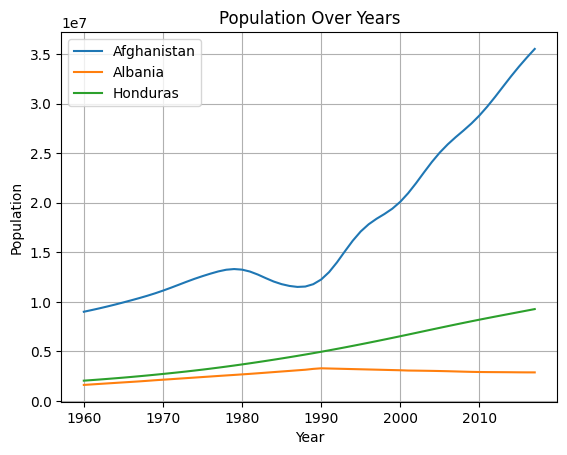

In [162]:
# Visualisasi data populasi untuk beberapa negara tertentu
countries_to_visualize = ['Afghanistan', 'Albania', 'Honduras']

for country in countries_to_visualize:
    country_data = data[data["Country Name"] == country]
    plt.plot(country_data["Year"], country_data["Population"], label=country)

plt.title("Population Over Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()

Anlysis visualisasi :

Analisis Visualisasi Populasi Afghanistan, Albania, dan Honduras


Pertumbuhan Populasi:

- Afghanistan: Memiliki tingkat pertumbuhan populasi tercepat dari ketiga negara. Populasinya meningkat dari sekitar 10 juta pada tahun 1960 menjadi lebih dari 30 juta pada tahun 2010.
Albania: Memiliki tingkat pertumbuhan populasi yang lebih lambat daripada Afghanistan, tetapi lebih cepat daripada Honduras. Populasinya meningkat dari sekitar 2 juta pada tahun 1960 menjadi lebih dari 3 juta pada tahun 2010.
Honduras: Memiliki tingkat pertumbuhan populasi paling lambat dari ketiga negara. Populasinya meningkat dari sekitar 2 juta pada tahun 1960 menjadi sekitar 8 juta pada tahun 2010.
Perbandingan Populasi:

- Afghanistan: Memiliki populasi terbesar dari ketiga negara pada tahun 2010.
Albania: Memiliki populasi terkecil dari ketiga negara pada tahun 1960, tetapi melampaui Honduras pada tahun 1980.
Honduras: Memiliki populasi terkecil dari ketiga negara pada tahun 2010.
Pola Pertumbuhan:

- Afghanistan: Populasi Afghanistan mengalami pertumbuhan yang stabil selama periode waktu yang diperlihatkan.
Albania: Populasi Albania mengalami pertumbuhan yang stabil hingga tahun 1990, kemudian mengalami sedikit penurunan.
Honduras: Populasi Honduras mengalami pertumbuhan yang stabil hingga tahun 1980, kemudian mengalami sedikit penurunan.
Kesimpulan:

- Visualisasi ini menunjukkan bahwa ketiga negara memiliki tingkat pertumbuhan populasi yang berbeda. Afghanistan memiliki tingkat pertumbuhan populasi tercepat, diikuti oleh Albania dan Honduras. Populasi Afghanistan juga merupakan yang terbesar dari ketiga negara pada tahun 2010, sedangkan populasi Albania adalah yang terkecil.

### 4.2 Visualisasi 2

In [169]:
import plotly.graph_objects as go

# Visualisasi scatterplot data populasi untuk beberapa negara tertentu
countries_to_visualize = ["Indonesia", "China", "India"]
colors = ['blue', 'green', 'red', 'cyan', 'magenta']  # Warna untuk setiap negara

fig = go.Figure()

for i, country in enumerate(countries_to_visualize):
    country_data = data[data["Country Name"] == country]
    fig.add_trace(go.Scatter(x=country_data["Year"], y=country_data["Population"],
                             mode='markers', name=country, marker=dict(color=colors[i], size=10),
                             text=[f'{country}, {year}, Population: {pop}' for year, pop in zip(country_data["Year"], country_data["Population"])]))

fig.update_layout(title="data populasi untuk beberapa negara dari tahun ke tahun", xaxis_title="Year", yaxis_title="Population",
                  xaxis=dict(tickangle=45), showlegend=True)
fig.show()


analysis :

Pertumbuhan Populasi Keseluruhan

Dari tahun 1960 hingga 2020, ketiga negara tersebut mengalami pertumbuhan populasi yang signifikan. China memiliki populasi terbanyak sepanjang periode waktu tersebut.

- China: Populasi China tumbuh paling banyak dari sekitar 0,6 miliar pada tahun 1960 menjadi lebih dari 1,4 miliar pada tahun 2020.
India: Populasi India tumbuh dari sekitar 0,48 miliar pada tahun 1960 menjadi lebih dari 1,26 miliar pada tahun 2020.
Indonesia: Populasi Indonesia tumbuh dari sekitar 0,28 miliar pada tahun 1960 menjadi lebih dari 0,88 miliar pada tahun 2020.
Pertumbuhan Populasi Relatif

- China: Pertumbuhan populasi China tampaknya melambat dalam beberapa tahun terakhir.
India: Pertumbuhan populasi India tampaknya relatif konstan sepanjang periode waktu tersebut.
Indonesia: Pertumbuhan populasi Indonesia tampaknya meningkat dalam beberapa tahun terakhir.
Tahun 2000

- Pada tahun 2000, populasi China adalah yang terbesar dari ketiga negara tersebut sekitar 1,2 miliar.
Populasi India pada tahun 2000 sekitar 1 miliar.
Populasi Indonesia pada tahun 2000 sekitar 0,4 miliar.

### 4.3 Visualisasi 3

In [171]:
import plotly.graph_objects as go

# Visualisasi bar plot data populasi untuk beberapa negara tertentu
countries_to_visualize = ["United States", "China"]
colors = ['blue', 'green', 'red', 'cyan', 'magenta']  # Warna untuk setiap negara

fig = go.Figure()

for i, country in enumerate(countries_to_visualize):
    country_data = data[data["Country Name"] == country]
    fig.add_trace(go.Bar(x=country_data["Year"], y=country_data["Population"],
                         name=country, marker_color=colors[i]))

fig.update_layout(barmode='group', title="Population Barplot Over Years", xaxis_title="Year", yaxis_title="Population",
                  xaxis=dict(tickangle=45), showlegend=True)
fig.show()


### 4.4 Analysis Visualisasi

analysis data berdasarkan visualisasi di atas :

Analisis Pertumbuhan Populasi

Pertumbuhan Populasi Keseluruhan:
Menurut visualisasi ini, kedua negara, Amerika Serikat dan China, mengalami pertumbuhan populasi dari tahun 1960 hingga 2010. Namun, China memiliki populasi yang jauh lebih besar sepanjang periode tersebut.

- China: Populasi China tumbuh dari sekitar 0,6 miliar pada tahun 1960 menjadi lebih dari 1,2 miliar pada tahun 2010.

- Amerika Serikat: Populasi Amerika Serikat tumbuh dari sekitar 0,18 miliar pada tahun 1960 menjadi lebih dari 0,33 miliar pada tahun 2010.

Pertumbuhan Populasi Relatif:
Berdasarkan visualisasi ini, pertumbuhan populasi China tampaknya lebih besar daripada Amerika Serikat.

- China: Pertumbuhan populasi China terlihat lebih stabil sepanjang periode waktu tersebut.

- Amerika Serikat: Pertumbuhan populasi Amerika Serikat tampaknya sedikit meningkat antara tahun 2000 dan 2010.

Populasi Tahun 2010:
Menurut visualisasi ini, pada tahun 2010, populasi China lebih dari empat kali lipat populasi Amerika Serikat.

Populasi China pada tahun 2010 sekitar 1,2 miliar.

Populasi Amerika Serikat pada tahun 2010 sekitar 0,33 miliar.

Visualisasi ini menunjukkan perbedaan pertumbuhan populasi antara Amerika Serikat dan China.  China memiliki populasi yang jauh lebih besar dan pertumbuhan yang lebih stabil selama periode waktu tersebut.